# **In Depth Clustering Analysis of the Customer Segmentation Based on Cafe Sales**

## **Business Problem and Objectives**

1. How do sales of different café products correlate with each other throughout the day, and what are the key factors influencing these correlations? (EDA)
2. What are the distinct customer segments based on purchasing behavior, and how can we tailor marketing strategies to each segment?


## **Technique Used**

- **Handling Incorrect Data** This step involves identifying and correcting inaccuracies in the dataset to ensure data quality and reliability.

- **Removing Multiple Error Data** This process eliminates entries with significant errors or inconsistencies to maintain the integrity of the analysis.

- **Explanatory Data Analysis (Mean)** Calculating the mean provides insights into the central tendency of the data, helping to summarize and understand key characteristics.

- **Handling Missing Values Utilizing RandomForestRegressor** This technique imputes missing values based on the relationships between features, ensuring that the dataset remains complete for analysis.

- **Encoding** Converting categorical variables into numerical format allows machine learning algorithms to process the data effectively.

- **PCA (Principal Component Analysis)** PCA reduces dimensionality while preserving variance, simplifying the dataset and enhancing interpretability.

- **Elbow Method** This technique helps determine the optimal number of clusters by analyzing the inertia associated with different cluster counts.

- **Silhouette Score** This metric evaluates the quality of clustering by measuring how similar an object is to its own cluster compared to other clusters.

- **Descriptive Statistics of Non-Categorical Data** This analysis summarizes key metrics (mean, median, standard deviation) to provide a comprehensive overview of the numerical features.

- **Count Values of Categorical Data** This step quantifies the frequency of each category, offering insights into the distribution of categorical variables within the dataset.


## **Variables**

- **Transaction ID** A unique identifier for each transaction. Always present and unique.
- **Item** The name of the item purchased
- **Quantity** The quantity of the item purchased. 
- **Price per Unit** The price of a single unit of the item.
- **Total Spent** The total amount spent on the transaction.
- **Payment Method** The method of payment used.
- **Location** The location where the customer eat their orders.
- **Transaction Date** The date of the transaction.

Source: https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training

## **Key Findings**

**Cluster 0 comprises budget-conscious shoppers** likely aged between 18-25, who prefer lower-priced items and make smaller purchases. 
- This group averages 2 items per transaction at a mean price of approximately 1.51, resulting in total spending of around 3.04, with a maximum of 6.0.
- Their most frequently purchased items include Coffee, Cookies, and Tea, reflecting a preference for affordable snacks.
- Notably, they predominantly dine in, with 1,458 in-store purchases compared to 656 takeaway orders, indicating a strong preference for the in-person shopping experience.

**Cluster 1 High-End Customers** estimated to be aged 30-45, are characterized by their willingness to buy more expensive items and make larger purchases, reflecting a preference for quality. 
- They average 4 items per transaction at a mean price of 3.79, leading to total spending of about 15.27, with a maximum of 25.0.
- Popular items include Juice, Sandwiches, and Salads, aligning with their inclination towards higher-quality, ready-to-eat options.
- This cluster favors both dine-in (2,577) and takeaway (1,077) purchases, showcasing their flexible shopping habits.

**Cluster 2 consists of Selective Buyers** likely aged 25-35, who purchase fewer items but are willing to spend more per item. 
- They average 2 items per transaction at a mean price of 3.80, resulting in total spending of approximately 5.73, with a maximum of 10.0.
- Key items include Juice, Salad, and Cake, indicating a focus on healthier or indulgent options.
- Similar to Clusters 0 and 1, they prefer dine-in experiences, though their takeaway purchases (695) are lower than those in Cluster 1, suggesting a stronger emphasis on in-store shopping.

**Cluster 3 Value-Oriented Shoppers customers** estimated to be aged 40-55, are value-oriented shoppers who buy in bulk while favoring lower-priced items. 
- They have the highest mean quantity of about 5 items per transaction at a mean price of 1.51, leading to average spending of 6.86, with a maximum of 10.0.
- Popular items include Coffee, Cookies, and Tea, indicating a preference for affordable staples. However, they exhibit the lowest number of both dine-in and takeaway purchases, suggesting a more selective shopping behavior.
- Overall, all clusters show a preference for credit card payments, with Cluster 3 demonstrating a more cautious approach to spending.

### **Import and Read the data**

In [1]:
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = pd.read_csv("dirty_cafe_sales.csv")

### **Overview of Cafe Sales Data**

In [2]:
data

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


## **Pre Analysis**

### **Decide Variables**

In my analysis, I have chosen to concentrate on the following key attributes: Item, Quantity, Price Per Unit, Total Spent, Payment Method, Location, and Transaction Date. I have opted to exclude the Transaction ID from this selection, as it does not contribute to the analytical insights. Each Transaction ID is unique, and therefore, it lacks any discernible pattern that could enhance the overall analysis.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [4]:
data = data.drop(columns = "Transaction ID")

### **Check Unique value**

- Based on data Information, Quantity, price per unit, total spent should be in float, and I notice that there are a lot of missing value and incorrect data, such as 'NAN', 'UKNOWN' and 'ERROR'.
- Then I proceed to fixing incorrect data

In [5]:
#Identify quantity, price per unit, total spent unique value
unique_quantity = data["Quantity"].unique()
unique_pricerperunit = data["Price Per Unit"].unique()
unique_totalspent = data["Total Spent"].unique()

print ("Identify Unique Value:")
print (f"Quantity Unique Value: {unique_quantity}")
print (f"Price Per Unit Unique Value: {unique_pricerperunit}")
print (f"Total Spent Unique Value: {unique_totalspent}")

Identify Unique Value:
Quantity Unique Value: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
Price Per Unit Unique Value: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
Total Spent Unique Value: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']


In [6]:
#Identify data row has error and unknown value
data[(data["Quantity"].isin(["UNKNOWN", "ERROR"])) | (data["Price Per Unit"].isin(["UNKNOWN", "ERROR"])) | (data["Total Spent"].isin(["UNKNOWN", "ERROR"]))]

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
2,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
20,Smoothie,ERROR,4.0,20.0,Cash,In-store,2023-04-04
31,UNKNOWN,2,1.0,ERROR,Credit Card,ERROR,2023-11-06
42,Tea,2,1.5,UNKNOWN,NaN,Takeaway,2023-01-10
55,Cookie,ERROR,1.0,2.0,Credit Card,Takeaway,2023-03-19
...,...,...,...,...,...,...,...
9954,Coffee,4,2.0,ERROR,Credit Card,In-store,2023-11-21
9957,Coffee,ERROR,2.0,8.0,Credit Card,Takeaway,2023-11-15
9961,Tea,2,UNKNOWN,3.0,Cash,NaN,2023-12-29
9977,Juice,2,3.0,ERROR,Digital Wallet,In-store,2023-11-04


In [7]:
#Check the value, if it has been corrected or not
data.loc[18:25, :]

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
18,Cake,5,3.0,15.0,Cash,ERROR,2023-03-25
19,Juice,4,3.0,12.0,Cash,Takeaway,2023-01-15
20,Smoothie,ERROR,4.0,20.0,Cash,In-store,2023-04-04
21,Smoothie,4,4.0,16.0,Credit Card,Takeaway,2023-03-30
22,Sandwich,3,4.0,12.0,Digital Wallet,Takeaway,2023-12-01
23,Sandwich,2,4.0,8.0,NaN,NaN,2023-09-18
24,Sandwich,5,4.0,20.0,Cash,In-store,2023-06-03
25,Smoothie,3,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13


### **Handling Incorrect Data**
- As an example. I can see that there is an error value in the 20th row of the quantity.
- Noticeably, the quantity value is the result of the total spent value divided by the price per unit.
- Knowing this information, we proceed to loop through the error and unknown values and replace them with the correct values.

In [8]:
#Looping rows to replace error and unknown value
for index, columns in data.iterrows():
    try:
        if columns ["Quantity"] == "ERROR" or columns ["Quantity"] == "UNKNOWN":
            data.at[index, "Quantity"] = float(columns["Total Spent"]) / float(columns["Price Per Unit"])
        if columns ["Price Per Unit"] == "ERROR" or columns ["Price Per Unit"] == "UNKNOWN":
            data.at[index, "Price Per Unit"] = float(columns["Total Spent"]) / float(columns["Quantity"])
        if columns ["Total Spent"] == "ERROR" or columns ["Total Spent"] == "UNKNOWN":
            data.at[index, "Total Spent"] = float(columns["Quantity"]) * float(columns["Price Per Unit"])
    except:
        continue

In [9]:
# Check if the has been change or not for quality variable.
data.loc[18:25, :]

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
18,Cake,5,3.0,15.0,Cash,ERROR,2023-03-25
19,Juice,4,3.0,12.0,Cash,Takeaway,2023-01-15
20,Smoothie,5.0,4.0,20.0,Cash,In-store,2023-04-04
21,Smoothie,4,4.0,16.0,Credit Card,Takeaway,2023-03-30
22,Sandwich,3,4.0,12.0,Digital Wallet,Takeaway,2023-12-01
23,Sandwich,2,4.0,8.0,NaN,NaN,2023-09-18
24,Sandwich,5,4.0,20.0,Cash,In-store,2023-06-03
25,Smoothie,3,4.0,NaN,UNKNOWN,UNKNOWN,2023-12-13


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Item              9667 non-null   object
 1   Quantity          9854 non-null   object
 2   Price Per Unit    9814 non-null   object
 3   Total Spent       9819 non-null   object
 4   Payment Method    7421 non-null   object
 5   Location          6735 non-null   object
 6   Transaction Date  9841 non-null   object
dtypes: object(7)
memory usage: 547.0+ KB


## **Removing Multiple Error Data**
Next, I will identify any data entries that contain double unknowns or errors. To maintain the accuracy and reliability of our analysis, I will remove these erroneous data points. By eliminating such inaccuracies, I can concentrate on the valid data, which will ultimately lead to more precise and trustworthy analytical outcomes.
- Looping to identify which value inconsistent value
- Replacing unknown and error into missing value
- Dropping missing value on 'Transaction Date' since our goal is not time series. Then delete the unecessary data in this column would enhance the understanding of the data

In [11]:
double_incorrect = data[(data["Quantity"].isin(["UNKNOWN", "ERROR"])) | (data["Price Per Unit"].isin(["UNKNOWN", "ERROR"])) | (data["Payment Method"].isin(["UNKNOWN", "ERROR"])) | (data["Total Spent"].isin(["UNKNOWN", "ERROR"]))]

In [12]:
#Choosing which data has error/unknown to be deleted.
delete_a = []
for index_a, row_a in double_incorrect.iterrows():
    counting_unique = Counter(list(row_a.values))
    if counting_unique["ERROR"] + counting_unique["UNKNOWN"] + counting_unique[np.nan]> 2:
        delete_a.append(index_a)

delete_a

[25,
 168,
 236,
 334,
 617,
 641,
 727,
 863,
 912,
 1120,
 1212,
 1274,
 1436,
 1481,
 1571,
 1761,
 1854,
 1914,
 2000,
 2289,
 2326,
 2330,
 2585,
 2599,
 2796,
 2866,
 3635,
 3673,
 3697,
 3779,
 4092,
 4152,
 4225,
 4300,
 4656,
 5125,
 5285,
 5997,
 6023,
 6087,
 6120,
 6136,
 6269,
 6285,
 6399,
 6574,
 6630,
 6658,
 6661,
 6674,
 6891,
 7187,
 7227,
 7604,
 7686,
 7819,
 7923,
 8021,
 8218,
 8316,
 8317,
 8351,
 8465,
 8908,
 9153,
 9212,
 9348,
 9578,
 9988]

In [13]:
#Drop the unecessary data
data = data.drop(index = delete_a)

In [14]:
#Replace inconsistency data with missing value
data[["Quantity", "Price Per Unit", "Total Spent"]] = data[["Quantity", "Price Per Unit", "Total Spent"]].replace(["UNKNOWN", "ERROR"],np.nan)
data[["Payment Method", "Transaction Date", "Item", "Location"]] = data[["Payment Method", "Transaction Date", "Item", "Location"]].replace(["UNKNOWN", "ERROR"],np.nan)

In [15]:
#Dropping the missing value of transaction date
data = data.dropna(subset=["Transaction Date"])

## **Checking the Unique Value and Info of the Data after Handle the Inconsistent Data**

In [16]:
#Identify quantity, price per unit, total spent unique value after handling the inscosistency data
unique_quantity = data["Quantity"].unique()
unique_pricerperunit = data["Price Per Unit"].unique()
unique_totalspent = data["Total Spent"].unique()
unique_item = data["Item"].unique()
unique_location = data["Location"].unique()
unique_payment = data["Payment Method"].unique()

print ("Identify Unique Value:")
print (f"Quantity Unique Value: {unique_quantity}")
print (f"Price Per Unit Unique Value: {unique_pricerperunit}")
print (f"Total Spent Unique Value: {unique_totalspent}")
print (f"Item Value: {unique_item}")
print (f"Location Value: {unique_location}")
print (f"Payment Method: {unique_payment}")

Identify Unique Value:
Quantity Unique Value: ['2' '4' '5' '3' '1' 5.0 2.0 1.0 nan 3.0 4.0]
Price Per Unit Unique Value: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 5.0 3.0 1.0 1.5 4.0 2.0]
Total Spent Unique Value: ['4.0' '12.0' 4.0 '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' 2.0 3.0 '2.0' nan '1.0' '7.5' '4.5' 9.0 '1.5' 6.0 7.5 20.0
 15.0 12.0 25.0 8.0 1.0 16.0 10.0 4.5 5.0]
Item Value: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
Location Value: ['Takeaway' 'In-store' nan]
Payment Method: ['Credit Card' 'Cash' nan 'Digital Wallet']


In [17]:
#change type data
change_type = ["Quantity", "Price Per Unit", "Total Spent"]
for i in change_type:
    data[i] = data[i].astype("float")

## **Explanatory Data Analysis**

### **Identify mean of the selected variables based on Item List**

The mean provides a measure of the central tendency of the data, indicating the average value. This helps analysts grasp the overall level of the dataset. Since the focus variables are total spent, item, price per unit and quantity to answer the explanatory data analysis.

In [18]:
mean_data = data[["Total Spent", "Item", "Price Per Unit", "Quantity"]].groupby(by = "Item").mean()

In [19]:
mean_data

,Total Spent,Price Per Unit,Quantity
Item,,,
Cake,9.073446,3.0,3.028275
Coffee,6.085455,2.0,3.049136
Cookie,2.980276,1.0,2.977340
Juice,8.935135,3.0,2.983740
Salad,15.176580,5.0,3.030499
Sandwich,12.171920,4.0,3.044508
Smoothie,12.256809,4.0,3.061896
Tea,4.562874,1.5,3.048467


### **Visualization of bar chart visualization to identify each selected variables mean based on Item List**

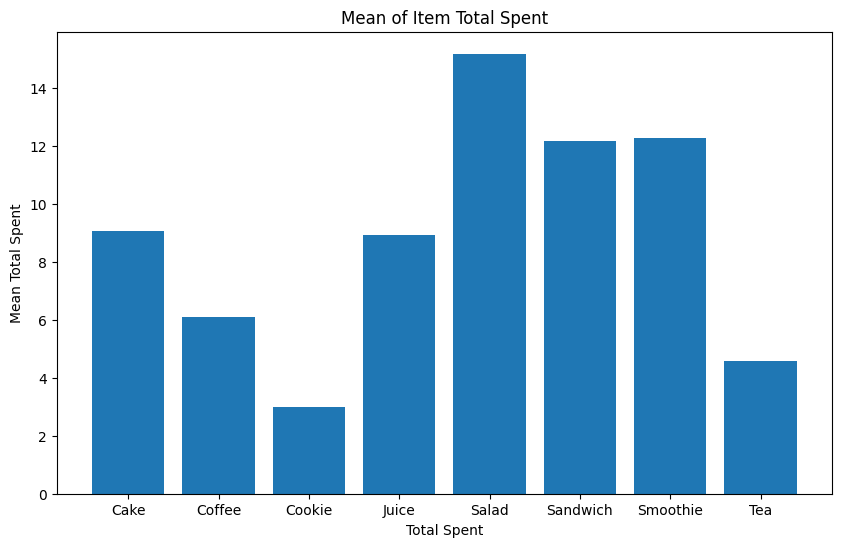

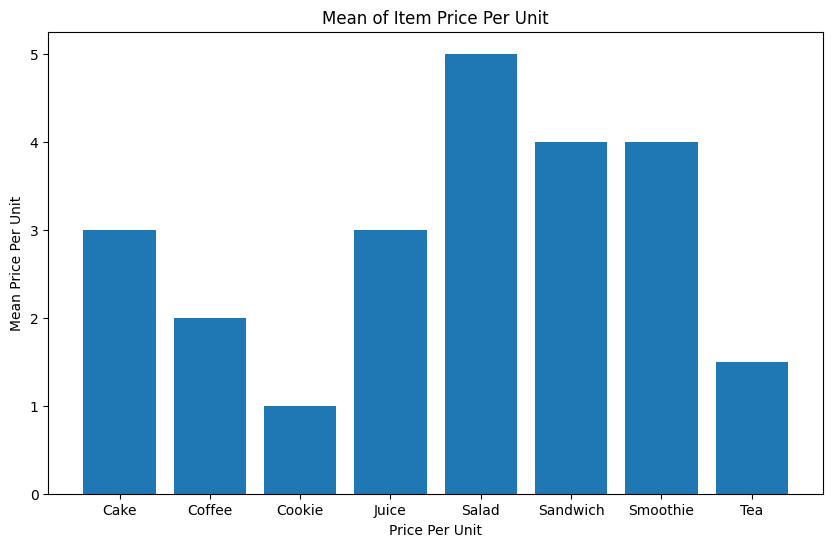

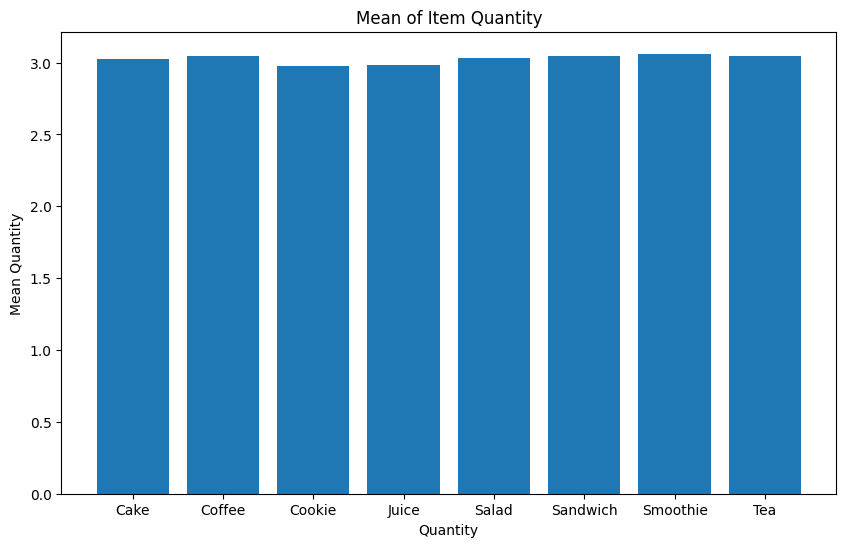

In [20]:
for i in mean_data:
    y_mean = mean_data[i].tolist()
    x_data = mean_data.index.tolist()

    plt.figure(figsize=(10,6))
    plt.bar(x_data, y_mean)
    plt.xlabel(f"{i}")
    plt.ylabel(f"Mean {i}")
    plt.title(f"Mean of Item {i}")
    plt.show()

### **Visualization of histogram visualization to identify each selected variables distribution**

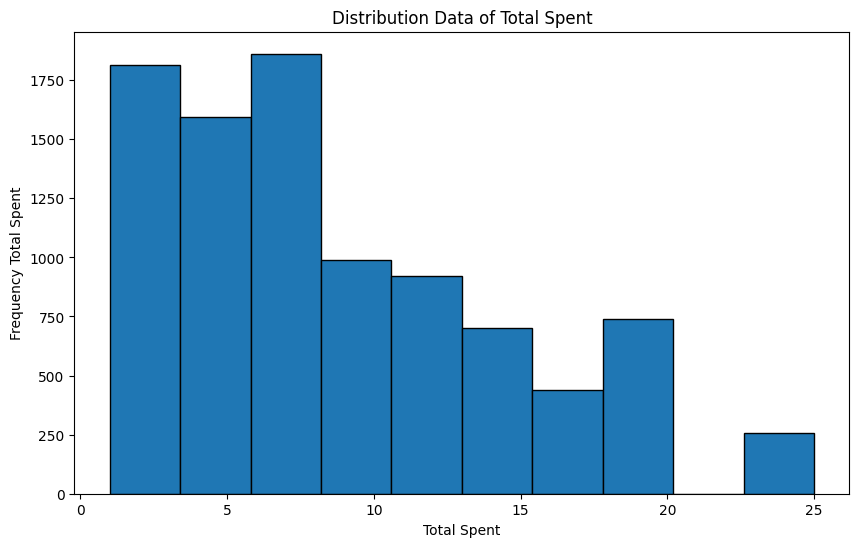

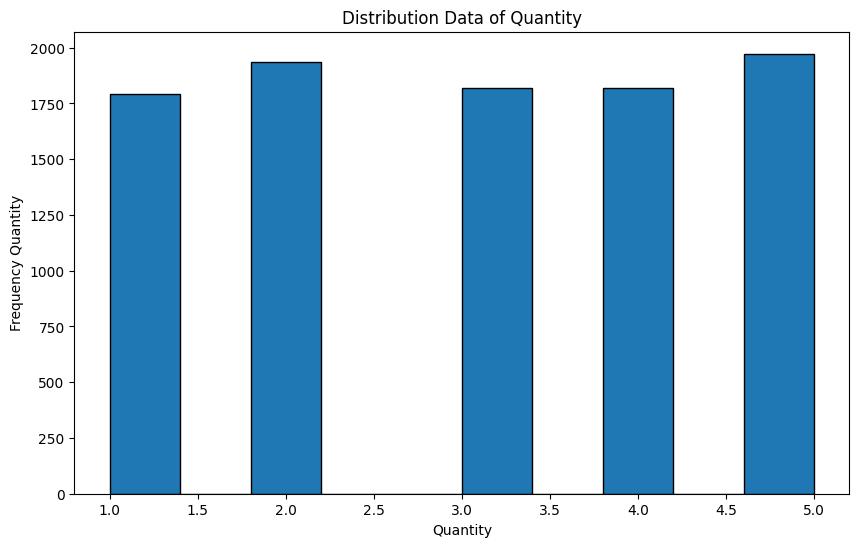

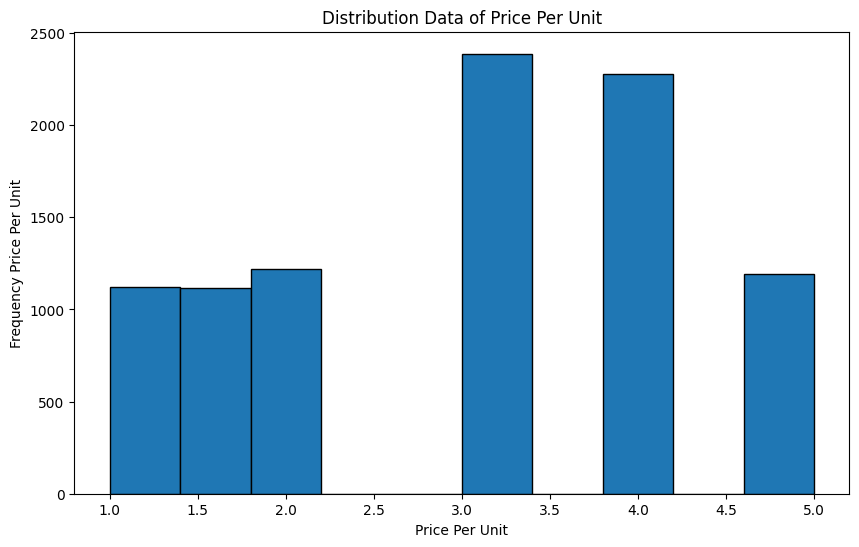

In [21]:
for i in ["Total Spent", "Quantity", "Price Per Unit"]:
    x_hist = data[i].tolist()

    plt.figure(figsize=(10,6))
    plt.hist(x_hist, edgecolor= "black")
    plt.xlabel(f"{i}")
    plt.ylabel(f"Frequency {i}")
    plt.title(f"Distribution Data of {i}")
    plt.show()

### **Explanatory Data Analysis Insight**

Based on the exploratory data analysis, I observe trends through histograms of variables (Total Spent, Price per Unit, and Quantity) and the Mean table. This is necessary to identify customer purchasing behaviors, understand price sensitivity, and optimize inventory management strategies effectively.

- The histogram depicting the distribution of total spent provides several key insights into customer spending behavior. Notably, there is a concentration of spending in the lower ranges, particularly between 0 and 10, indicating that many customers tend to make smaller purchases. This trend aligns with the mean table data, where items like Coffee and Cookie have lower prices per unit (2.00 and 1.00) but still generate significant total spends due to their quantities purchased (around 3 units each).

- Furthermore, while Salad has the highest total spent at approximately 15.18 despite its higher price per unit (5.00), it reflects a willingness among some customers to invest more in certain items.

- Overall, these insights suggest that while many customers prefer affordable options for regular purchases, there are also opportunities for promoting higher-priced items within specific categories to enhance overall sales performance.

In [22]:
data[["Total Spent", "Item", "Price Per Unit", "Quantity"]].groupby(by = "Item").sum()

,Total Spent,Price Per Unit,Quantity
Item,,,
Cake,9636.0,3177.0,3213.0
Coffee,6694.0,2202.0,3351.0
Cookie,3022.0,1010.0,3022.0
Juice,9918.0,3318.0,3303.0
Salad,16330.0,5400.0,3279.0
Sandwich,12744.0,4216.0,3215.0
Smoothie,12600.0,4080.0,3166.0
Tea,4572.0,1507.5,3082.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9487 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item              8592 non-null   object 
 1   Quantity          9343 non-null   float64
 2   Price Per Unit    9312 non-null   float64
 3   Total Spent       9318 non-null   float64
 4   Payment Method    6519 non-null   object 
 5   Location          5753 non-null   object 
 6   Transaction Date  9487 non-null   object 
dtypes: float64(3), object(4)
memory usage: 592.9+ KB


## **Handling Missing Value**

Handling missing values is essential for maintaining data integrity, improving model performance, and ensuring statistical validity. Using a Random Forest Regressor for this purpose is advantageous due to its imputation capabilities, robustness, and ability to capture complex relationships in the data. By effectively addressing missing values, you can enhance the quality of your dataset.

In [24]:
imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), random_state=42)
new_data = data.copy()
new_data[["Quantity", "Price Per Unit", "Total Spent"]] = imputer.fit_transform(data[["Quantity", "Price Per Unit", "Total Spent"]])

In [25]:
new_data.isna().sum()

Item                 895
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2968
Location            3734
Transaction Date       0
dtype: int64

## **Encoding**
Most machine learning algorithms, supervised or unsupervised ML such as clustering, it requires numerical input to perform calculations. Categorical variables, if left unencoded, cannot be processed directly, leading to errors or misinterpretations. Proper encoding of categorical data can significantly impact the performance of machine learning models. By ensuring that categorical variables are represented in a way that the model can understand, you enable it to learn patterns and relationships more effectively.

In [26]:
le = LabelEncoder()
imputer = IterativeImputer(estimator=RandomForestClassifier(random_state=42), random_state=42)

encoded_data = ["Item", "Location", "Payment Method"]

for i in encoded_data:
    new_data[f"{i}_encoded"] = le.fit_transform(new_data[i].astype(str))
    new_data.loc[new_data[i].isna(), f"{i}_encoded"] = np.nan
    new_data[f"{i}_encoded"] = imputer.fit_transform(new_data[[f"{i}_encoded"]])
    new_data[f"{i}_check"] = le.inverse_transform(new_data[f"{i}_encoded"].astype(int))

In [27]:
new_data #item, item_encoded, location_encoded, payment method_encoded

,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,Item_encoded,Item_check,Location_encoded,Location_check,Payment Method_encoded,Payment Method_check
0,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,1.000000,Coffee,1.000000,Takeaway,1.000000,Credit Card
1,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,0.000000,Cake,0.000000,In-store,0.000000,Cash
2,Cookie,4.0,1.0,4.0,Credit Card,In-store,2023-07-19,2.000000,Cookie,0.000000,In-store,1.000000,Credit Card
3,Salad,2.0,5.0,10.0,NaN,NaN,2023-04-27,4.000000,Salad,0.501999,In-store,1.006136,Credit Card
4,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,1.000000,Coffee,0.000000,In-store,2.000000,Digital Wallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Coffee,2.0,2.0,4.0,NaN,NaN,2023-08-30,1.000000,Coffee,0.501999,In-store,1.006136,Credit Card
9996,NaN,3.0,1.0,3.0,Digital Wallet,NaN,2023-06-02,3.461941,Juice,0.501999,In-store,2.000000,Digital Wallet
9997,Coffee,4.0,2.0,8.0,Digital Wallet,NaN,2023-03-02,1.000000,Coffee,0.501999,In-store,2.000000,Digital Wallet
9998,Cookie,3.0,1.0,3.0,Digital Wallet,NaN,2023-12-02,2.000000,Cookie,0.501999,In-store,2.000000,Digital Wallet


### **Comparing the original dataset with the data after encoded and missing value has been handled**

In [28]:
#Before data has been handled
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9487 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item              8592 non-null   object 
 1   Quantity          9343 non-null   float64
 2   Price Per Unit    9312 non-null   float64
 3   Total Spent       9318 non-null   float64
 4   Payment Method    6519 non-null   object 
 5   Location          5753 non-null   object 
 6   Transaction Date  9487 non-null   object 
dtypes: float64(3), object(4)
memory usage: 592.9+ KB


In [29]:
# Making a new variable
data_eo = new_data.copy()
data_eo = data_eo.drop(columns = ["Item", "Item_encoded", "Location", "Location_encoded", "Payment Method", "Payment Method_encoded"])

In [30]:
#Change the Transaction data data type from object to datetime64
data_eo["Transaction Date"] = pd.to_datetime(data_eo["Transaction Date"])

In [31]:
data_eo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9487 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Quantity              9487 non-null   float64       
 1   Price Per Unit        9487 non-null   float64       
 2   Total Spent           9487 non-null   float64       
 3   Transaction Date      9487 non-null   datetime64[ns]
 4   Item_check            9487 non-null   object        
 5   Location_check        9487 non-null   object        
 6   Payment Method_check  9487 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 592.9+ KB


In [32]:
data_eo["Transaction Year"] = data_eo["Transaction Date"].dt.year
data_eo["Transaction Month"] = data_eo["Transaction Date"].dt.month
data_eo["Transaction Day"] = data_eo["Transaction Date"].dt.day

In [33]:
data_eo = data_eo.drop(columns = ["Transaction Date"])

In [34]:
data_eo

,Quantity,Price Per Unit,Total Spent,Item_check,Location_check,Payment Method_check,Transaction Year,Transaction Month,Transaction Day
0,2.0,2.0,4.0,Coffee,Takeaway,Credit Card,2023,9,8
1,4.0,3.0,12.0,Cake,In-store,Cash,2023,5,16
2,4.0,1.0,4.0,Cookie,In-store,Credit Card,2023,7,19
3,2.0,5.0,10.0,Salad,In-store,Credit Card,2023,4,27
4,2.0,2.0,4.0,Coffee,In-store,Digital Wallet,2023,6,11
...,...,...,...,...,...,...,...,...,...
9995,2.0,2.0,4.0,Coffee,In-store,Credit Card,2023,8,30
9996,3.0,1.0,3.0,Juice,In-store,Digital Wallet,2023,6,2
9997,4.0,2.0,8.0,Coffee,In-store,Digital Wallet,2023,3,2
9998,3.0,1.0,3.0,Cookie,In-store,Digital Wallet,2023,12,2


In [35]:
#Check after the  transaction date divided into year, month and day, then change it 
data_eo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9487 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Quantity              9487 non-null   float64
 1   Price Per Unit        9487 non-null   float64
 2   Total Spent           9487 non-null   float64
 3   Item_check            9487 non-null   object 
 4   Location_check        9487 non-null   object 
 5   Payment Method_check  9487 non-null   object 
 6   Transaction Year      9487 non-null   int32  
 7   Transaction Month     9487 non-null   int32  
 8   Transaction Day       9487 non-null   int32  
dtypes: float64(3), int32(3), object(3)
memory usage: 630.0+ KB


### **Convert Categorical Variables into boolean values**

Most machine learning algorithms require numerical input. Since the there are categorical data, if left in its original form, cannot be processed directly. Converting to boolean values allows these algorithms to interpret the data correctly, to proceed the necessary analysis.

In [36]:
data_eo = pd.get_dummies(data_eo, columns = ["Item_check", "Location_check", "Payment Method_check"]).astype(int)

In [37]:
data_eo

,Quantity,Price Per Unit,Total Spent,Transaction Year,Transaction Month,Transaction Day,Item_check_Cake,Item_check_Coffee,Item_check_Cookie,Item_check_Juice,Item_check_Salad,Item_check_Sandwich,Item_check_Smoothie,Item_check_Tea,Location_check_In-store,Location_check_Takeaway,Payment Method_check_Cash,Payment Method_check_Credit Card,Payment Method_check_Digital Wallet
0,2,2,4,2023,9,8,0,1,0,0,0,0,0,0,0,1,0,1,0
1,4,3,12,2023,5,16,1,0,0,0,0,0,0,0,1,0,1,0,0
2,4,1,4,2023,7,19,0,0,1,0,0,0,0,0,1,0,0,1,0
3,2,5,10,2023,4,27,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2,2,4,2023,6,11,0,1,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,2,4,2023,8,30,0,1,0,0,0,0,0,0,1,0,0,1,0
9996,3,1,3,2023,6,2,0,0,0,1,0,0,0,0,1,0,0,0,1
9997,4,2,8,2023,3,2,0,1,0,0,0,0,0,0,1,0,0,0,1
9998,3,1,3,2023,12,2,0,0,1,0,0,0,0,0,1,0,0,0,1


## **Identifying Outliers**

**Identifying outliers is essential for maintaining data integrity**, improving model performance, and gaining insights into the dataset. Boxplots are a powerful tool for visualizing data distributions and effectively identifying outliers through their clear representation of the median, quartiles, and potential anomalies. In my analysis, the boxplot of total spent revealed one outlier; however, **I decided not to handle it because I want to preserve the originality of the data**

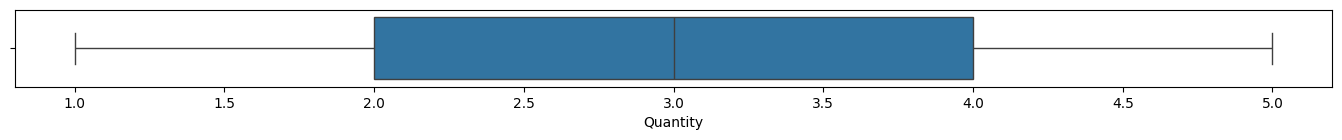

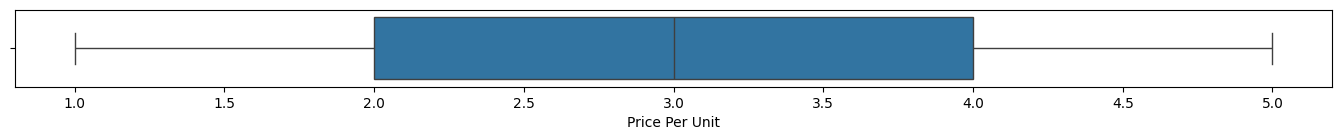

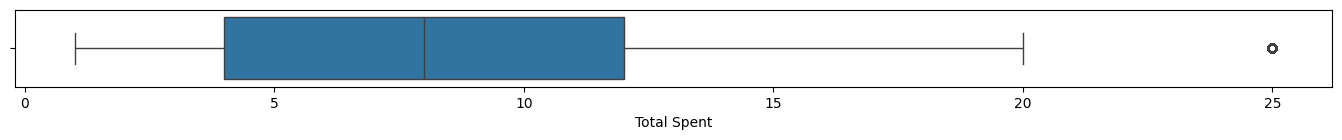

In [38]:
for i in data_eo[["Quantity", "Price Per Unit", "Total Spent"]]:
    plt.figure(figsize=(17, 1))
    sns.boxplot(data= data_eo[["Quantity", "Price Per Unit", "Total Spent"]], x=i)

### **Clustering Location by Item, Quantity, Price Per Unit**

To gain insights into customer behavior patterns, **I chose to focus on the Item variable, analyzing it in conjunction with Quantity and Price Per Unit.** This analysis aims to identify which customer segments are most suitable for targeted promotions and bundling strategies, specifically differentiating between takeaway and dine-in orders. By examining these variables, **I can better understand purchasing trends and preferences, allowing for more effective marketing strategies tailored to the distinct needs of each customer segment.**

**Variable**
- **Item** The name of the item purchased
- **Quantity** The quantity of the item purchased. 
- **Price per Unit** The price of a single unit of the item.
- **Total Spent** The total amount spent on the transaction.
- **Location** The location where the transaction occurred.

In [39]:
#Identify all the columns
data_eo.columns

Index(['Quantity', 'Price Per Unit', 'Total Spent', 'Transaction Year',
       'Transaction Month', 'Transaction Day', 'Item_check_Cake',
       'Item_check_Coffee', 'Item_check_Cookie', 'Item_check_Juice',
       'Item_check_Salad', 'Item_check_Sandwich', 'Item_check_Smoothie',
       'Item_check_Tea', 'Location_check_In-store', 'Location_check_Takeaway',
       'Payment Method_check_Cash', 'Payment Method_check_Credit Card',
       'Payment Method_check_Digital Wallet'],
      dtype='object')

In [40]:
#Choose which focused variabel to enhance the analysis
columns = ['Quantity', 'Price Per Unit', 'Item_check_Cake',
       'Item_check_Coffee', 'Item_check_Cookie', 'Item_check_Juice',
       'Item_check_Salad', 'Item_check_Sandwich', 'Item_check_Smoothie',
       'Item_check_Tea', 'Location_check_In-store', 'Location_check_Takeaway']

In [41]:
data = data_eo[columns]

In [42]:
data

,Quantity,Price Per Unit,Item_check_Cake,Item_check_Coffee,Item_check_Cookie,Item_check_Juice,Item_check_Salad,Item_check_Sandwich,Item_check_Smoothie,Item_check_Tea,Location_check_In-store,Location_check_Takeaway
0,2,2,0,1,0,0,0,0,0,0,0,1
1,4,3,1,0,0,0,0,0,0,0,1,0
2,4,1,0,0,1,0,0,0,0,0,1,0
3,2,5,0,0,0,0,1,0,0,0,1,0
4,2,2,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,2,0,1,0,0,0,0,0,0,1,0
9996,3,1,0,0,0,1,0,0,0,0,1,0
9997,4,2,0,1,0,0,0,0,0,0,1,0
9998,3,1,0,0,1,0,0,0,0,0,1,0


## **Principal Component Analysis (PCA)**
- **PCA reduces the number of variables in a dataset while retaining the essential information** This is particularly useful when dealing with high-dimensional data, where many features may be correlated.
- From an initial set of 19 variables, I focused on 12 key variables for my analysis With this refined selection, I utilized Principal Component Analysis (PCA) to effectively **reduce dimensionality and uncover underlying patterns within the data.** By transforming these 12 variables into a smaller set of uncorrelated principal components, **I aimed to retain the maximum amount of variance while simplifying the dataset**

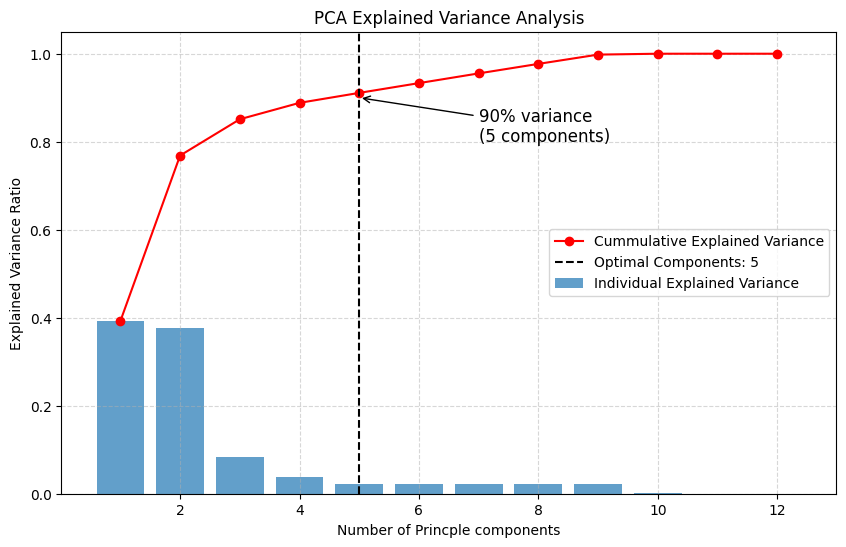

In [43]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data)
explained_variance = pca.explained_variance_ratio_
cummulative_variance = np.cumsum(explained_variance)
n_components = np.argmax(cummulative_variance >= 0.9) + 1
fig,ax = plt.subplots(figsize = (10,6))
ax.bar(range(1,len(explained_variance) + 1), explained_variance, alpha = 0.7, label = "Individual Explained Variance")
ax.plot(range(1,len(cummulative_variance) + 1), cummulative_variance, marker = "o", color = "r", label = "Cummulative Explained Variance")
ax.axvline(n_components, linestyle = "--", color = "black", label = f"Optimal Components: {n_components}")
ax.annotate(f"90% variance\n({n_components} components)",
           xy = (n_components, 0.9), xytext = (n_components + 2, 0.8),
                arrowprops = dict(arrowstyle = "->", color = "black"), fontsize = 12, color = "black")

ax.set_xlabel("Number of Princple components")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("PCA Explained Variance Analysis")
ax.legend()
ax.grid(True, linestyle = "--", alpha= 0.5)
plt.show()

Based on the PCA output, with a 10% tolerance for error, the optimal number of components is 5. Selecting these components allows for **significant dimensionality reduction while retaining 90% of the variance** This simplification enhances model performance and interpretability. The chart also shows that the first few components capture most of the variance, while additional components contribute progressively less.

In [44]:
pca = PCA(n_components = 5)
data_pca = pca.fit_transform(data)

In [45]:
# cumsum for ...
np.cumsum(pca.explained_variance_ratio_)

array([0.39238213, 0.76861529, 0.85108137, 0.88834595, 0.91100386])

In [46]:
data_pca

array([[-1.16732495, -0.73833835, -0.97184236, -0.23993068,  0.86129368],
       [ 0.98262282, -0.05473435,  0.42981234, -0.22867803, -0.361627  ],
       [ 0.61775004, -2.08458359,  0.44232784, -0.2080463 , -0.24657229],
       ...,
       [ 0.80180992, -1.07484547,  0.44535037, -0.23786383,  0.85279542],
       [-0.36665895, -1.90877433,  0.44069868, -0.21218479, -0.24531818],
       [ 0.18050085,  1.13849896,  0.41659068, -0.23403265, -0.12916741]])

In [47]:
#Identify of each value as PCA 1, 2, 3, 4, 5.
dataset_new = pd.DataFrame(data_pca, columns = ["PCA 1", "PCA 2", "PCA 3", "PCA 4", "PCA 5"])
dataset_new

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5
0,-1.167325,-0.738338,-0.971842,-0.239931,0.861294
1,0.982623,-0.054734,0.429812,-0.228678,-0.361627
2,0.617750,-2.084584,0.442328,-0.208046,-0.246572
3,-0.623519,2.335010,0.397255,-0.248905,0.092444
4,-1.167008,-0.723227,0.442092,-0.246141,0.855304
...,...,...,...,...,...
9482,-1.167008,-0.723227,0.442092,-0.246141,0.855304
9483,-0.348752,-1.795619,0.453332,0.842307,-0.000337
9484,0.801810,-1.074845,0.445350,-0.237864,0.852795
9485,-0.366659,-1.908774,0.440699,-0.212185,-0.245318


# **Utilize Elbow Method to Check Optimal Cluster**

- KMeans is a clustering algorithm that partitions the dataset into a specified number of clusters (k), assigning data points to the nearest cluster centroid. Inertia, or within-cluster sum of squares, measures how tightly the clusters are packed by quantifying the distance between each data point and its assigned cluster centroid. 

- In the Elbow Method, KMeans is executed multiple times with varying values of k, and for each k, the inertia is calculated and stored. 

- This allows me to visualize the inertia against the number of clusters, helping to identify the "elbow point" where adding more clusters yields diminishing returns in reducing inertia, thus indicating the optimal number of clusters.

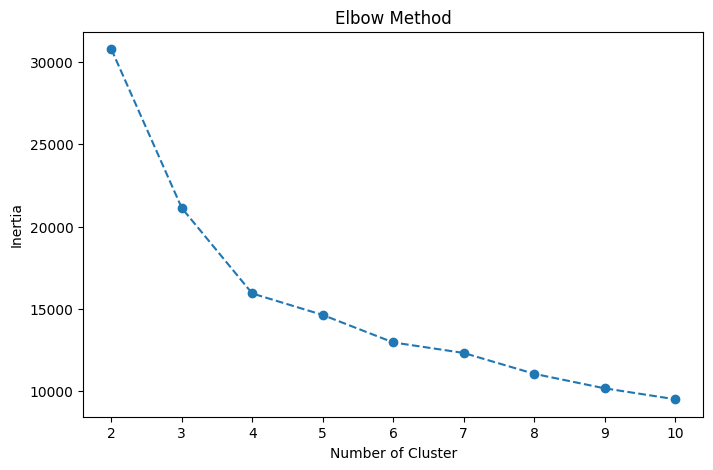

In [48]:
# Elbow Method with KMeans Clustering Algorithm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

imercia = []
for i in range (2,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(dataset_new)
    imercia.append(kmeans.inertia_)

plt.figure(figsize= (8,5))
plt.plot(range(2,11), imercia, marker="o", linestyle="--")
plt.xlabel("Number of Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

## **Silhouette Score**
- Since the elbow point in the Elbow Method is not clearly noticeable, the Silhouette Score becomes essential for determining the optimal number of clusters.
- The Silhouette Score is a metric that measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a score **close to 1 indicates that the data point is well-clustered, a score near 0 suggests that the data point is on or very close to the decision boundary between two neighboring clusters**, and a negative score indicates that the data point may have been assigned to the wrong cluster.

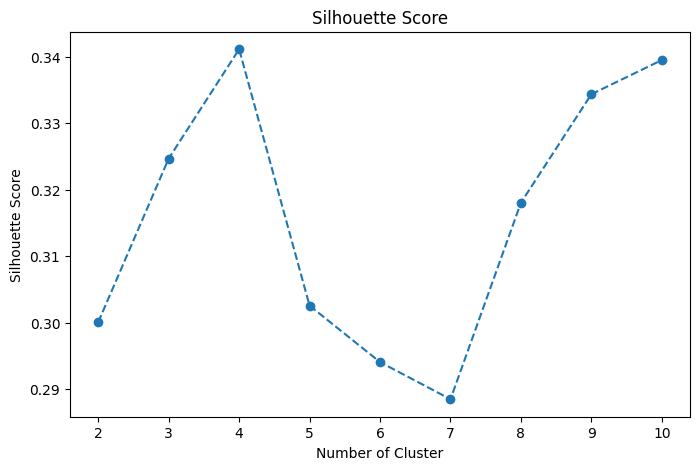

In [49]:
# Silhouette score with KMeans Clustering Algorithm
s_score = []
for i in range (2,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    cluster_labels = kmeans.fit_predict(dataset_new)
    sil_score = silhouette_score(dataset_new, cluster_labels)
    s_score.append(sil_score)

plt.figure(figsize= (8,5))
plt.plot(range(2,11), s_score, marker="o", linestyle="--")
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

In [50]:
n_optimal = 4
kmeans = KMeans(n_clusters = n_optimal, random_state = 42)
labels = kmeans.fit_predict(dataset_new)

In [51]:
#Clear unused variable
new_data = new_data.drop(columns = ["Item", "Location", "Payment Method", "Item_encoded", "Location_encoded", "Payment Method_encoded"])

In [52]:
new_data

,Quantity,Price Per Unit,Total Spent,Transaction Date,Item_check,Location_check,Payment Method_check
0,2.0,2.0,4.0,2023-09-08,Coffee,Takeaway,Credit Card
1,4.0,3.0,12.0,2023-05-16,Cake,In-store,Cash
2,4.0,1.0,4.0,2023-07-19,Cookie,In-store,Credit Card
3,2.0,5.0,10.0,2023-04-27,Salad,In-store,Credit Card
4,2.0,2.0,4.0,2023-06-11,Coffee,In-store,Digital Wallet
...,...,...,...,...,...,...,...
9995,2.0,2.0,4.0,2023-08-30,Coffee,In-store,Credit Card
9996,3.0,1.0,3.0,2023-06-02,Juice,In-store,Digital Wallet
9997,4.0,2.0,8.0,2023-03-02,Coffee,In-store,Digital Wallet
9998,3.0,1.0,3.0,2023-12-02,Cookie,In-store,Digital Wallet


In [53]:
# Add a new variable to the dataset to identify the cluster group for each data point, labeling them as 0, 1, 2, or 3 based on their assigned cluster.
new_data["Group_cluster"] = labels

new_data

,Quantity,Price Per Unit,Total Spent,Transaction Date,Item_check,Location_check,Payment Method_check,Group_cluster
0,2.0,2.0,4.0,2023-09-08,Coffee,Takeaway,Credit Card,0
1,4.0,3.0,12.0,2023-05-16,Cake,In-store,Cash,1
2,4.0,1.0,4.0,2023-07-19,Cookie,In-store,Credit Card,3
3,2.0,5.0,10.0,2023-04-27,Salad,In-store,Credit Card,2
4,2.0,2.0,4.0,2023-06-11,Coffee,In-store,Digital Wallet,0
...,...,...,...,...,...,...,...,...
9995,2.0,2.0,4.0,2023-08-30,Coffee,In-store,Credit Card,0
9996,3.0,1.0,3.0,2023-06-02,Juice,In-store,Digital Wallet,0
9997,4.0,2.0,8.0,2023-03-02,Coffee,In-store,Digital Wallet,3
9998,3.0,1.0,3.0,2023-12-02,Cookie,In-store,Digital Wallet,0


## **Descriptive Statistics and Count Categorical Data Values by Each Clusters**

## **Descriptive Statistics of Non Categorical Data Values**

In [54]:
# Descriptive Statistics
new_data[["Quantity", "Price Per Unit", "Total Spent", "Group_cluster"]].groupby(by="Group_cluster").agg(["mean", "median", "max", "min", "std"])

Quantity                            Price Per Unit              \
                   mean median  max  min       std           mean median  max   
Group_cluster                                                                   
0              2.005203    2.0  3.0  1.0  0.803136       1.514664    1.5  2.0   
1              4.023862    4.0  5.0  3.0  0.823258       3.791898    4.0  5.0   
2              1.512505    2.0  2.0  1.0  0.499950       3.798643    4.0  5.0   
3              4.519858    5.0  5.0  4.0  0.499783       1.515248    1.5  2.0   

                             Total Spent                              
               min       std        mean median   max  min       std  
Group_cluster                                                         
0              1.0  0.410202    3.044229    3.0   6.0  1.0  1.522293  
1              3.0  0.746892   15.271643   15.0  25.0  9.0  4.427573  
2              3.0  0.763167    5.738025    6.0  10.0  3.0  2.236457  
3              1.0  0.413078    6.856738    7.5  10.0  4.0  2.048569

### **Insight Summarization**
**Customers in Cluster 0 are likely budget-conscious shoppers who prefer lower-priced items and make smaller purchases.**
1. This group has a mean quantity of approximately 2, indicating that customers tend to purchase fewer items.
2. The mean price per unit is around 1.51, suggesting that they buy relatively inexpensive products.
3. The total spent averages about 3.04, with a maximum of 6.0, indicating modest spending behavior.
**Insight: Customers in Cluster 0 are likely budget-conscious shoppers who prefer lower-priced items and make smaller purchases.**

**Cluster 1 customers tend to buy more expensive items and are likely to make larger purchases, reflecting a preference for quality or premium products.**
1. Customers in this cluster have a mean quantity of 4, indicating a tendency to buy more items per transaction.
2. The mean price per unit is higher at approximately 3.79, suggesting they are willing to spend more on each item.
3. The total spent averages around 15.27, with a maximum of 25.0, indicating a significant spending capacity.

**Customers in Cluster 2 appear to be selective buyers who purchase fewer items but are willing to spend a bit more per item compared to Cluster 0.**
1. This group has a mean quantity of 2, similar to Cluster 0, indicating fewer items purchased.
2. The mean price per unit is around 3.80, suggesting they also buy moderately priced items.
3. The total spent averages about 5.73, with a maximum of 10.0, indicating moderate spending behavior.

**Cluster 3 customers are likely to be value-oriented shoppers who buy in bulk or larger quantities but prefer lower-priced items.**
1. Customers in this cluster have the highest mean quantity of approximately 5, indicating a tendency to buy more items.
2. The mean price per unit is around 1.51, suggesting they prefer lower-priced products.
3. The total spent averages about 6.86, with a maximum of 10.0, indicating moderate spending.

### **Count Categorical Data Values by Each Clusters**

In [55]:
# Counting Unique Values to Determine Cluster Behavior 
new_data[["Item_check", "Location_check", "Payment Method_check", "Group_cluster"]].groupby(by="Group_cluster").value_counts()

item = new_data[["Item_check", "Group_cluster"]].groupby(by="Group_cluster").value_counts()
location = new_data[["Location_check", "Group_cluster"]].groupby(by="Group_cluster").value_counts()
payment_method = new_data[["Payment Method_check", "Group_cluster"]].groupby(by="Group_cluster").value_counts()

In [56]:
display(item)

Group_cluster  Item_check
0              Coffee         659
               Cookie         618
               Tea            614
               Juice          220
               Cake             2
               Sandwich         1
1              Juice         1005
               Sandwich       660
               Salad          649
               Cake           646
               Smoothie       643
               Cookie           1
2              Juice          666
               Salad          446
               Cake           432
               Sandwich       412
               Smoothie       403
3              Coffee         460
               Cookie         413
               Tea            411
               Juice          126
Name: count, dtype: int64

### **Summarization of Item Preferences Insight**
**Item Preferences of cluster 0** The most frequently purchased items include Coffee (659), Cookie (618), and Tea (614), reflecting a preference for affordable snacks and beverages.

**Item Preferences of cluster 1** The most popular item is Juice (1005), followed by Sandwich (660) and Salad (649), indicating a preference for higher-quality, ready-to-eat options.

**Item Preferences of cluster 2** Key items include Juice (666), Salad (446), and Cake (432), reflecting a focus on healthier or more indulgent options.

**Item Preferences of cluster 3** Popular items include Coffee (460), Cookie (413), and Tea (411), indicating a preference for affordable staples.

In [57]:
display(location)

Group_cluster  Location_check
0              In-store          1458
               Takeaway           656
1              In-store          2527
               Takeaway          1077
2              In-store          1664
               Takeaway           695
3              In-store           950
               Takeaway           460
Name: count, dtype: int64

### **Summarization of Location Preferences Insight**

**Customers in Cluster 0 predominantly dine in** with 1458 a significantly higher number of in-store purchases compared to takeaway, 656. This suggests that they may prefer the experience of shopping in person, possibly valuing the ability to browse products directly.

**Cluster 1 customers also favor dine-in** but they have a higher volume of both in-store (2,577) and takeaway purchases (1,077)compared to Cluster 0. This indicates a flexible shopping behavior, where they are comfortable with both purchasing methods, possibly depending on convenience or time constraints.

**Similar to Clusters 0 and 1, customers in Cluster 2 show a preference for dine-in**. However, their takeaway purchases are lower than those in Cluster 1 (695), suggesting they may prioritize the in-store experience but are less inclined to opt for takeaway options.

**Customers in Cluster 3 have the lowest number of both dine-in and takeaway purchases** This could indicate a more selective shopping behavior, where they may only shop occasionally or prefer specific items.

In [58]:
display(payment_method)

Group_cluster  Payment Method_check
0              Credit Card             1152
               Digital Wallet           502
               Cash                     460
1              Credit Card             1926
               Cash                     843
               Digital Wallet           835
2              Credit Card             1276
               Cash                     549
               Digital Wallet           534
3              Credit Card              781
               Digital Wallet           325
               Cash                     304
Name: count, dtype: int64

### **Summarization of Payment Method Preferences Insight**

Overall, all clusters show a preference for credit card payments, with varying degrees of openness to digital wallets and cash. Clusters 0, 1, and 2 demonstrate a stronger inclination towards credit cards, while Cluster 3 exhibits a more balanced but cautious approach to spending.